In [3]:
import my_sql_routines.options_signal_loader as osl
osl.load_atm_vols_4settle_date(settle_date=20160322)


REPLACE INTO option_ticker_indicators (ticker, ticker_head, ticker_month, ticker_year,  cal_dte, tr_dte, atm_vol, price_date, created_date, last_updated_date) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)


In [1]:
import signals.option_signals as ops
ops.get_vcs_signals(ticker1='ESM2016',ticker2='ESU2016',settle_date=20160322)


{'current': {'imp_vol_ratio': 0.9148910991765964},
 'hist':       settleDates  TickerYear1  TickerMonth1  trDTE1  calDTE1  underlying1  \
 0        19940103         1994             6     116      164       467.05   
 1        19940104         1994             6     115      163       468.65   
 2        19940105         1994             6     114      162       469.20   
 3        19940106         1994             6     113      161       469.00   
 4        19940107         1994             6     112      160       472.35   
 5        19940110         1994             6     111      157       477.10   
 6        19940111         1994             6     110      156       476.45   
 7        19940112         1994             6     109      155       475.20   
 8        19940113         1994             6     108      154       474.60   
 9        19940114         1994             6     107      153       475.65   
 10       19940117         1994             6     106      150       474

In [1]:
import futures_charts.options_curve as oc
oc.get_vcs_panel_plot(ticker_list=['LCQ2016','LCV2016'],report_date=20160322)

TypeError: string indices must be integers

In [2]:
import matplotlib.pyplot as plt
plt.plot(imp_vol_ratio)
plt.grid()         
         
plt.show()

In [ ]:
import opportunity_constructs.utilities as ocu
aligned_output = ocu.get_aligned_futures_data(contract_list=['NGU2016','NGX2016','NGF2017'],aggregation_method=12,contracts_back=10,date_to=20160218)
#aligned_output = ocu.get_aligned_futures_data(contract_list=['HOV2007','HOX2007'],aggregation_method=12,contracts_back=10,date_to=20070420)
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']
#bf_price = aligned_data['c1']['close_price']-aligned_data['c2']['close_price']
#bf_price_recent = bf_price[1:]
#aligned_data_recent = aligned_data[1:]
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [1]:
import read_exchange_files.process_cme_options as pco
selected_frame = pco.process_cme_options_4ticker(ticker='CDF2017',report_date=20160303)
ticker='ECF2017'
#selected_frame[(selected_frame['ticker'] == ticker)&(selected_frame['option_type'] == 'C')]
selected_frame

,asset_type,maturity_string,option_type,ticker_head,ticker_year,ticker_month,ticker


In [5]:
import os.path
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160226, ext='raw_options_data')
options_data_dir
file_name='commodity'

os.path.isfile(options_data_dir + '/' + file_name + '_formatted_.pkl')

options_data_dir + '/' + file_name + '_formatted_.pkl'

'C:\\Research/data/options_data_raw/2016/201602/20160226/commodity_formatted_.pkl'

In [1]:
import 

,ticker,qty
0,BF2017,68
1,BG2017,-2
2,BH2017,20
3,BJ2017,-20
4,BK2017,-23
5,BM2016,-10
6,BM2017,23
7,BM2018,-5
8,BM2019,-6
9,BN2016,20


In [1]:
import ta.abn_position_reconciler as apr
wuhu = apr.reconcile_position()
wuhu

,ticker,qty_x,qty_y,qty_diff
49,RBZ2016,1,-2,3
50,RBF2017,-1,5,-6
61,KCU2016,-2,-1,-1
62,KCZ2016,2,1,1
65,SBN2017,-13,-11,-2
66,SBV2017,26,22,4
67,SBH2018,-13,-11,-2
71,BX2016,62,72,-10
72,BZ2016,-128,-148,20
73,BF2017,68,78,-10


In [22]:
import opportunity_constructs.spread_carry as sc

spread_carry_output = sc.generate_spread_carry_sheet_4date(report_date=20160331)
spread_report = spread_carry_output['spread_report']
ticker_head_list = list(spread_report['tickerHead'].unique())
# Compare BO and S sizing

spread_report[spread_report['tickerHead']==ticker_head_list[19]]
#spread_report[spread_report['tickerHead']=='CC']

,ticker1,ticker2,tickerHead,front_tr_dte,carry,q_carry,reward_risk,price,q,upside,downside,change5,change10,change20
0,OJK2016,OJN2016,OJ,28,NaN,NaN,NaN,0.45,71,538.24,-566.66,NaN,NaN,NaN
1,OJN2016,OJU2016,OJ,70,82.5,5,0.03,-0.10,66,323.29,-301.24,NaN,NaN,NaN
2,OJU2016,OJX2016,OJ,114,15.0,4,0.01,-0.20,62,298.31,-315.34,NaN,NaN,NaN
3,OJX2016,OJF2017,OJ,156,22.5,-9,0.01,-0.35,71,159.98,-180.83,NaN,NaN,NaN
4,OJF2017,OJH2017,OJ,197,67.5,8,0.04,-0.80,63,90.41,-213.30,NaN,NaN,NaN
5,OJH2017,OJK2017,OJ,239,-120.0,-1,-0.25,0.00,64,56.25,-109.16,NaN,NaN,NaN


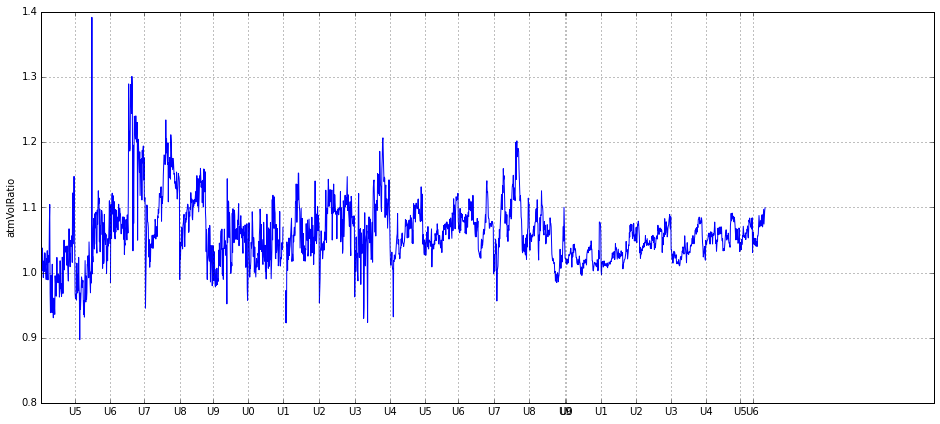

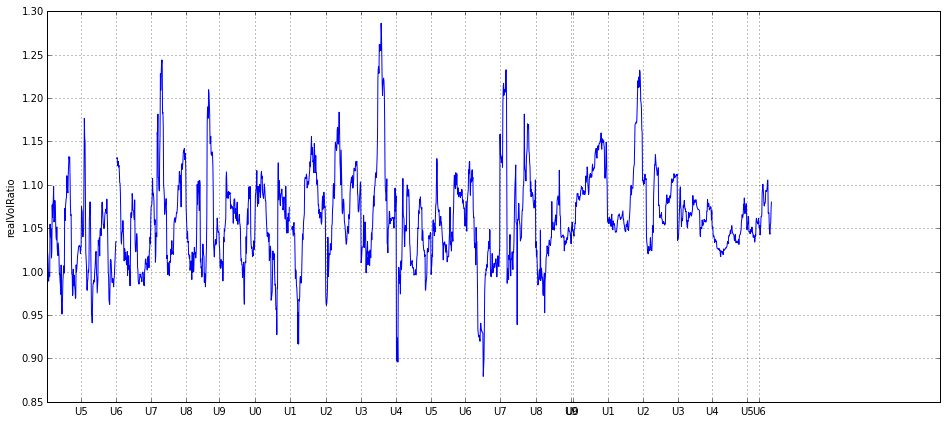

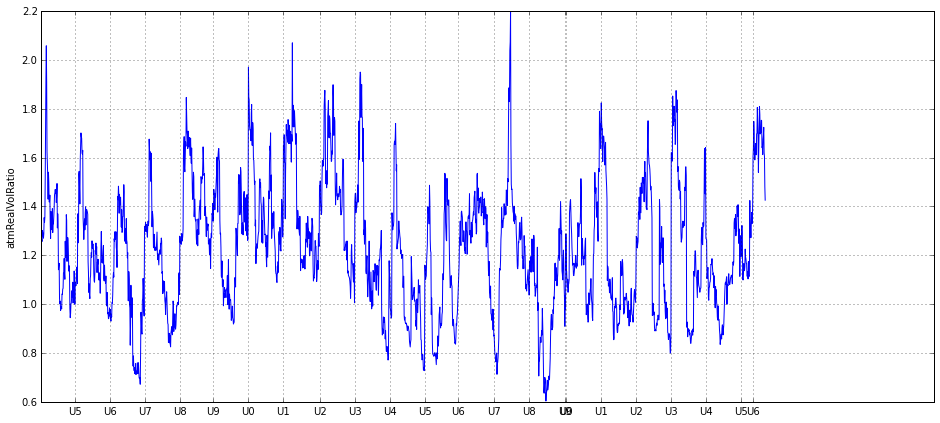

In [2]:
import futures_charts.options_curve as ocr
%matplotlib inline
ocr.get_vcs_panel_plot(ticker_list=['WU2016','WZ2016'],report_date = 20160331,diagnostics_q=False)


In [2]:
import signals.option_signals as ops
wuhu = ops.get_vcs_signals(ticker_list=['LCQ2016','LCV2016'],settle_date=20160330)
wuhu['atm_vol_ratio']

90.0
134.0


1.0924413328147284

In [1]:
import opportunity_constructs.vcs as vcs
wuhu = vcs.generate_vcs_sheet_4date(date_to=20160331)
wuhu.sort('Q',ascending=False)

,ticker1,ticker2,tickerHead,tickerClass,trDte1,trDte2,Q,atmVolRatio,realVolRatio,atmRealVolRatio
19,LNM2016,LNN2016,LN,Livestock,52,74,88,1.042790,1.123488,1.136887
43,WU2016,WZ2016,W,Ag,104,167,84,1.099671,1.080085,1.425880
1,BON2016,BOQ2016,BO,Ag,60,79,81,0.992302,1.006220,1.062446
16,LCZ2016,LCG2017,LC,Livestock,172,214,73,1.049743,0.999622,1.311609
22,LNV2016,LNZ2016,LN,Livestock,138,180,72,1.029447,1.057937,1.430404
13,LCM2016,LCQ2016,LC,Livestock,45,89,71,1.090784,1.090476,1.337470
14,LCQ2016,LCV2016,LC,Livestock,89,133,71,1.079522,1.072485,1.337093
0,BOM2016,BON2016,BO,Ag,36,60,69,1.016701,1.000000,1.080190
15,LCV2016,LCZ2016,LC,Livestock,133,172,68,1.067694,1.054217,1.328376
3,BOU2016,BOV2016,BO,Ag,104,123,62,1.039574,1.005909,1.097016


In [1]:
import signals.option_signals as ops
wuhu = ops.get_aligned_option_indicators(ticker_list=['ESK2016','ESM2016'],settle_date=20160331)

wuhu

[     settleDates  TickerYear  TickerMonth  trDTE  calDTE  underlying  \
 0       20000309        2000            5     50      71      1422.5   
 1       20000310        2000            5     49      70      1417.8   
 2       20000313        2000            5     48      67      1401.5   
 3       20000314        2000            5     47      66      1380.0   
 4       20000315        2000            5     46      65      1413.2   
 5       20000316        2000            5     45      64      1478.0   
 6       20000317        2000            5     44      63      1489.0   
 7       20000320        2000            5     43      60      1478.1   
 8       20000321        2000            5     42      59      1507.5   
 9       20000322        2000            5     41      58      1517.5   
 10      20000323        2000            5     40      57      1544.0   
 11      20000324        2000            5     39      56      1555.4   
 12      20000327        2000            5     38  

In [1]:
tr_dte1 = 36
tr_dte2 = 55
import contract_utilities.contract_meta_info as cmi
import numpy as np
import signals.option_signals as ops

tr_dte_list = [36,55]
ref_tr_dte_list = []

selection_matrix = []

for i in range(2):
    ref_tr_dte_list.append([y for y in cmi.aligned_data_tr_dte_list if y <= tr_dte_list[i]+15 and y>=tr_dte_list[i]-15])

    
ops.get_ranked_contract_selection_4vol_strategies(ref_tr_dte_list=ref_tr_dte_list,tr_dte_list=tr_dte_list)
    
    


[[2, 2], [1, 2], [3, 3], [4, 3], [0, 1], [5, 4]]

In [8]:
print(ref_tr_dte_list)

print(tr_dte_list)

[[25, 30, 35, 40, 45, 50], [40, 45, 50, 60, 70]]
[36, 55]


In [19]:
cmi.aligned_data_tr_dte_list

[10,
 15,
 20,
 25,
 30,
 35,
 40,
 40,
 45,
 50,
 60,
 70,
 80,
 90,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 330,
 360,
 390]

In [4]:
import signals.option_signals as ops
%time ops.calc_realized_vol_4options_ticker(ticker='LNJ2016',settle_date=20160328,futures_data_dictionary=futures_data_dictionary)

Wall time: 11 ms


19.039079461389555

In [5]:
%time ops.calc_realized_vol_4options_ticker(ticker='LNJ2016',settle_date=20160328)

Wall time: 52 ms


19.039079461389555

In [18]:
import option_models.utils as omu
%time omu.get_option_underlying(ticker='LNJ2016')

Wall time: 0 ns


'LNJ2016'

In [3]:
import get_price.get_futures_price as gfp 
import numpy as np
data = gfp.get_futures_price_preloaded(ticker='GCM2016')
logreturns  = np.log(data['close_price'][-21:]/data['close_price'][-21:].shift(1))
np.sqrt(252*logreturns.var())

0.18669374729051541

In [1]:
import signals.option_signals as os
os.calc_realized_vol_4futures_ticker(ticker='GCM2016',settle_date=20160324)

18.22549244806024

In [3]:
import signals.option_signals as os
os.calc_realized_vol_4options_ticker(ticker='GCQ2016',settle_date=20160324)




18.192859441745874

In [1]:
import signals.option_signals as os
os.calc_realized_vol_4futures_ticker(ticker='GCM2016',settle_date=20160324)

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,cont_indx,change1,change2,change5,change10,change20,change_5,change_1
283,2016-02-17,GCM2016,GC,6,2016,132,92,1211.8,4759,201606,4.5,-16.2,12.6,32.3,39.5,12.7,3.2
284,2016-02-18,GCM2016,GC,6,2016,131,91,1226.8,8274,201606,-20.7,-8.2,-10.3,40.4,24.2,31.7,15.0
285,2016-02-19,GCM2016,GC,6,2016,130,90,1231.3,2784,201606,12.5,29.1,24.5,54.5,35.1,-17.0,4.5
286,2016-02-22,GCM2016,GC,6,2016,127,89,1210.6,2108,201606,16.6,16.3,8.4,41.0,27.2,-29.3,-20.7
287,2016-02-23,GCM2016,GC,6,2016,126,88,1223.1,8964,201606,-0.3,-18.7,2.9,18.8,-14.1,14.5,12.5
288,2016-02-24,GCM2016,GC,6,2016,125,87,1239.7,9454,201606,-18.4,-4.3,19.7,34.6,-15.9,27.9,16.6
289,2016-02-25,GCM2016,GC,6,2016,124,86,1239.4,11020,201606,14.1,10.5,50.7,39.7,NaN,12.6,-0.3
290,2016-02-26,GCM2016,GC,6,2016,123,85,1221.0,5930,201606,-3.6,7.5,30.0,11.3,NaN,-10.3,-18.4
291,2016-02-29,GCM2016,GC,6,2016,120,84,1235.1,13802,201606,11.1,27.6,32.6,0.7,NaN,24.5,14.1
292,2016-03-01,GCM2016,GC,6,2016,119,83,1231.5,7149,201606,16.5,29.1,15.9,-11.6,NaN,8.4,-3.6


In [5]:
import copy as cpy
my_dict = {'a':1,'b':2}
my_dict_2 = cpy.deepcopy(my_dict)
my_dict_2.pop('a')

print(my_dict_2)
print(my_dict)

{'b': 2}
{'a': 1, 'b': 2}


In [ ]:
import read_exchange_files.process_cme_futures as pcf
import read_exchange_files.read_cme_files as rcf
cme_output = pcf.process_cme_futures_4tickerhead(ticker_head='RB', report_date=20160225)
#data_read_out = rcf.read_cme_future_settle_csv_files(file_name='nymex_futures', report_date=20160224)
#title_frame = data_read_out['title_frame']
#title_frame
#title_frame[title_frame['ticker_head']=='LN']

#data_read_out[data_read_out['ticker_head']=='CL']

#data_read_out['month_strike_list'][68]
cme_output['settle_frame']

In [ ]:
import get_price.get_futures_price as gfp
import shared.calendar_utilities as cu
import contract_utilities.expiration as exp
price_frame = gfp.get_futures_price_preloaded(ticker_head='ED',settle_date=20160225)
price_frame.sort('tr_dte',ascending=True,inplace=True)


exp_date = 20170225


exp_datetime = cu.convert_doubledate_2datetime(exp_date)

price_frame['exp_date'] = [exp.get_futures_expiration(x) for x in price_frame['ticker']]
price_frame = price_frame[price_frame['exp_date']<exp_datetime]

price_frame['implied_rate'] = 100-price_frame['close_price']

price_frame[['implied_rate','exp_date','cal_dte']]


In [ ]:
[1+(price_frame['implied_rate'].iloc[x]*(price_frame['cal_dte'].iloc[x+1]-price_frame['cal_dte'].iloc[x])/36500) for x in range(len(price_frame.index)-1)]

1+(price_frame['implied_rate'].iloc[0]*price_frame['cal_dte'].iloc[0]/365000)


1+((price_frame['implied_rate'].iloc[-1]*((exp_datetime-price_frame['exp_date'].iloc[-1].to_datetime()).days))/365000)


In [6]:
import interest_curve.get_rate_from_stir as grfs
wuhu = grfs.get_simple_rate(as_of_date=20160216,date_to=20160718)

print(wuhu['rate_output'])

wuhu['price_frame']



0.00648406165771


,ticker,cal_dte,exp_date,implied_rate
126,EDG2016,-1,2016-02-15,0.6182
2500,EDH2016,27,2016-03-14,0.6375
82,EDJ2016,62,2016-04-18,0.6550
61,EDK2016,90,2016-05-16,0.6600
2432,EDM2016,118,2016-06-13,0.6650
20,EDN2016,153,2016-07-18,0.6750
1,EDQ2016,181,2016-08-15,0.6850
2369,EDU2016,216,2016-09-19,0.7000
2305,EDZ2016,307,2016-12-19,0.7500
2244,EDH2017,391,2017-03-13,0.7950


In [3]:
import numpy as np
print(wuhu['middle_discount'])

print(wuhu['total_discount'])

print(wuhu['first_rate'])
print(wuhu['first_period'])

print(wuhu['last_rate'])
print(wuhu['last_period'])

print(wuhu['total_period'])

print(np.prod(np.array(wuhu['middle_discount'])))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500)))
print((1+(wuhu['last_rate']*wuhu['last_period']/36500)))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500))*
      (1+(wuhu['last_rate']*wuhu['last_period']/36500))*
     np.prod(np.array(wuhu['middle_discount'])))

KeyError: 'middle_discount'

In [1]:
import get_price.presave_price as pp
pp.generate_and_update_futures_data_files(ticker_head_list='cme_futures')
#data_out = pp.generate_and_update_futures_data_file_4tickerhead(ticker_head='B')
#data_out[data_out['ticker']=='BZ2016']

In [ ]:

import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
import futures_charts.futures_curve as fc
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=195)

In [ ]:
aligned_output = bf_signals_output['aligned_output']
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']

In [5]:
import matplotlib.pyplot as plt
plt.plot(wuhu['c1']['atm_vol']/wuhu['c2']['atm_vol'])
plt.grid()         
         
plt.show()

In [ ]:
bad_data = aligned_data[bf_price<-0.004]   #<-0.03
bad_data

# HOV2007,HOX2007, HOZ2007 20070213 to 20070413

In [ ]:
aligned_data.iloc[1047]

In [ ]:
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160208,ext='comex_options_csv_address')
options_data_dir

In [ ]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
report_date

In [ ]:
import scheduled_jobs.options_data_load_job as odlj
import shared.downloads as sd
sd.download_csv_from_web(web_address=odlj.comex_options_csv_address)


In [ ]:
import scheduled_jobs.options_data_load_job

In [ ]:
with open(r'C:\Research\data\options_data_raw\2016\201602\20160208\interest_rate.pkl','rb') as handle:
    wuhu = pickle.load(handle)

In [ ]:
scatter_matrix = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix +=(all_samples[:,i].reshape(3,1)).dot(
    (all_samples[:,i].reshape(3,1)-mean_vector).T)
print('Scatter Matrix\n',scatter_matrix)    

In [ ]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed
matrix_w

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_dataframe.index,(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-
         merged_dataframe['BOK2016']['close_price'])
         
         
plt.show()

In [ ]:
(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-merged_dataframe['BOK2016']['close_price']

In [ ]:


import matplotlib.pyplot as plt
plt.plot(range(len(aligned_dataframe.index)),aligned_dataframe['c1']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c2']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c3']['tr_dte'])
plt.grid()         
         
plt.show()

    

    

In [ ]:
merged_dataframe['c1']['tr_dte'].isnull().sum()
merged_dataframe['c3']['tr_dte'].isnull().sum()

In [ ]:
futures_dataframe

In [ ]:
print(trDte1)
print(trDte2)
print(trDte3)

In [ ]:
bf_price = (aligned_dataframe['c1']['close_price']+aligned_dataframe['c3']['close_price'])/2-aligned_dataframe['c2']['close_price']

In [ ]:
plt.plot(range(len(aligned_dataframe.index)),bf_price)
plt.grid()         
         
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(price_ratio)
plt.grid()
plt.show()

In [ ]:
import numpy as np
nan_matrix = np.empty((2,2))
nan_matrix[:] = np.NAN
nan_matrix